In [23]:
from tensorflow import keras
import numpy as np
import pandas as pd
import os

In [2]:
#import models
effNetV2SmModel = keras.models.load_model('models/effNetV2/small.h5')
effNetV2MedModel = keras.models.load_model('models/effNetV2/med.h5')
effNetV2LgModel = keras.models.load_model('models/effNetV2/large.h5')

In [3]:
#reimporting data
train = keras.utils.image_dataset_from_directory(
    directory='data/train/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True)
train = train.prefetch(32)
test = keras.utils.image_dataset_from_directory(
    directory='data/test/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True)
test = test.prefetch(32)
valid = keras.utils.image_dataset_from_directory(
    directory='data/valid/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    shuffle=False)
valid = valid.prefetch(32)

Found 58388 files belonging to 400 classes.
Found 2000 files belonging to 400 classes.
Found 2000 files belonging to 400 classes.


In [24]:
#helper code
labelDict = {}
labels = os.listdir('data/test')
for i in range(len(labels)):
    labelDict[i] = labels[i]
#def getSpecies(labelArray):
#    return labelDict[list(labelArray).index(1)]
#input_shape = (224,224,3)

In [5]:
smallEval = effNetV2SmModel.evaluate(valid, return_dict=True)
medEval = effNetV2MedModel.evaluate(valid, return_dict=True)
largeEval = effNetV2LgModel.evaluate(valid, return_dict=True)

63/63 [==============================] - 18s 217ms/step - loss: 1.2807 - accuracy: 0.8255


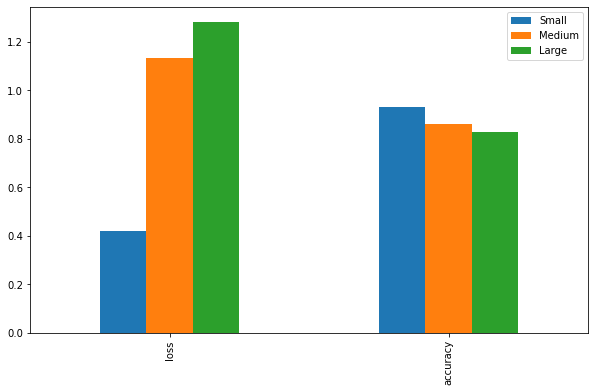

In [6]:
_=pd.DataFrame({'Small':smallEval, 'Medium':medEval, 'Large':largeEval}).plot.bar(figsize=(10,6))

The smaller model has both better validation accuracy and lower loss. This could be for several reasons. Since we trained only the output layer for each model, it would make sense that the model that started out the simplest would consequently train better, as a slightly smaller proportion of the model is frozen.

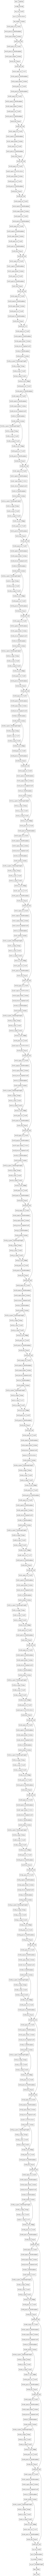

In [7]:
keras.utils.plot_model(effNetV2SmModel, to_file='finalModel.png')

In [13]:
y_pred = np.argmax(effNetV2SmModel.predict(valid), axis=1)
y_true = np.argmax(np.concatenate([y for x, y in valid], axis=0), axis=1)

63/63 [==============================] - 5s 79ms/step


In [25]:
from sklearn.metrics import classification_report

# Print f1, precision, and recall scores
print(classification_report(y_true, y_pred, target_names=labelDict.values()))

                             precision    recall  f1-score   support

            ABBOTTS BABBLER       1.00      0.80      0.89         5
              ABBOTTS BOOBY       0.83      1.00      0.91         5
 ABYSSINIAN GROUND HORNBILL       0.62      1.00      0.77         5
      AFRICAN CROWNED CRANE       1.00      1.00      1.00         5
     AFRICAN EMERALD CUCKOO       1.00      1.00      1.00         5
          AFRICAN FIREFINCH       1.00      0.80      0.89         5
     AFRICAN OYSTER CATCHER       1.00      0.80      0.89         5
                  ALBATROSS       1.00      1.00      1.00         5
             ALBERTS TOWHEE       1.00      1.00      1.00         5
       ALEXANDRINE PARAKEET       1.00      0.80      0.89         5
              ALPINE CHOUGH       1.00      1.00      1.00         5
      ALTAMIRA YELLOWTHROAT       1.00      1.00      1.00         5
            AMERICAN AVOCET       1.00      1.00      1.00         5
           AMERICAN BITTERN      